# Random Forest
Random forest merges a collection of independent decision trees to get a more accurate and stable prediction

Random forest works with both categorical and continueous target variable

Random forest does a better job with messy data, such as missing values, outliers, and maybe skewed data



Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)



In [2]:
# Import warnings module to prevent issuing warnings when a program uses an obsolete module

import warnings
warnings.filterwarnings("ignore", category=FutureWarning or RuntimeWarning or DeprecationWarning )

In [3]:
# Import the libraries we will use for this dataset

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline


In [4]:
# Read the Titanic dataset from the local directory into Pandas dataframe and display the first lines

titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis with visualization

In [5]:
# The training-set has 891 examples and 11 features + the target variable (survived)

titanic.shape

(891, 12)

In [6]:

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
# 38% of the Titanic passengers survived the wreck
# The age of Titanic passengers ranged from 0.42 to 80
# The age column is missing data

titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


0    549
1    342
Name: Survived, dtype: int64


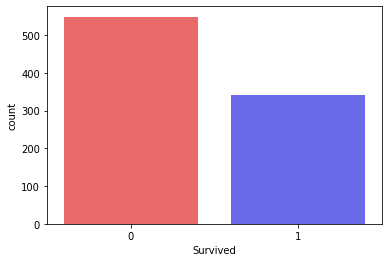

In [8]:
# Get an idea about the number of passengers who survived: less people survived the wreck

print(titanic['Survived'].value_counts())
sns.countplot(x='Survived',data=titanic,palette='seismic_r');

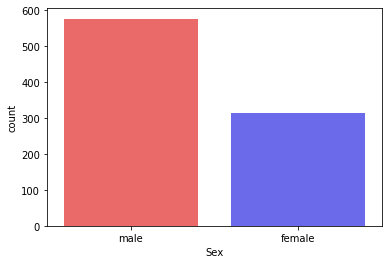

In [9]:
sns.countplot(x='Sex',data=titanic,palette='seismic_r');

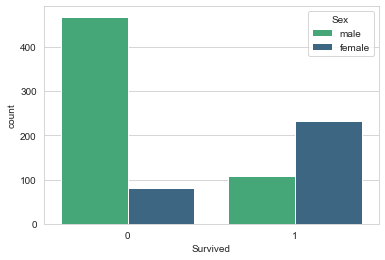

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=titanic,palette='viridis_r');

One thing to learn from these charts is that we have more female survivors than male survivors despite the fact that there were more male passengers onboard

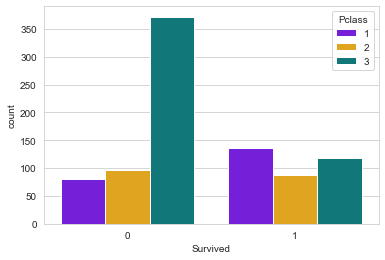

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=titanic,palette='prism_r');

It is obvious that passengers on Pclass 1 were more likely to survive than passengers in Pclass 3

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64


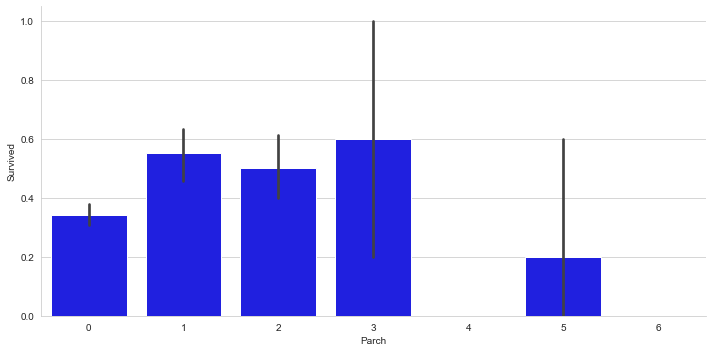

In [12]:
print(titanic.groupby('Parch').Survived.value_counts())
sns.catplot(x='Parch', y="Survived", data=titanic, kind='bar', aspect=2, color='b');

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64


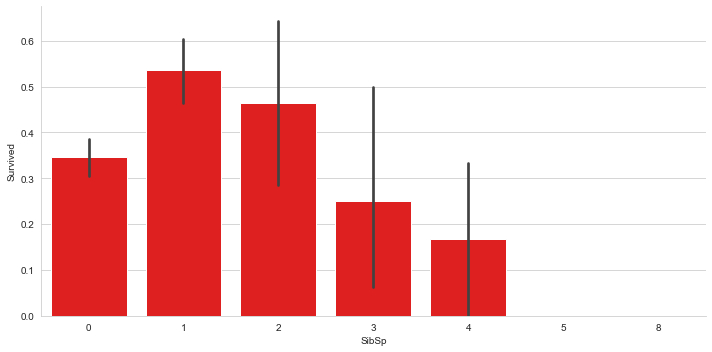

In [13]:
print(titanic.groupby('SibSp').Survived.value_counts())
sns.catplot(x='SibSp', y="Survived", data=titanic, kind='bar', aspect=2, color='r');

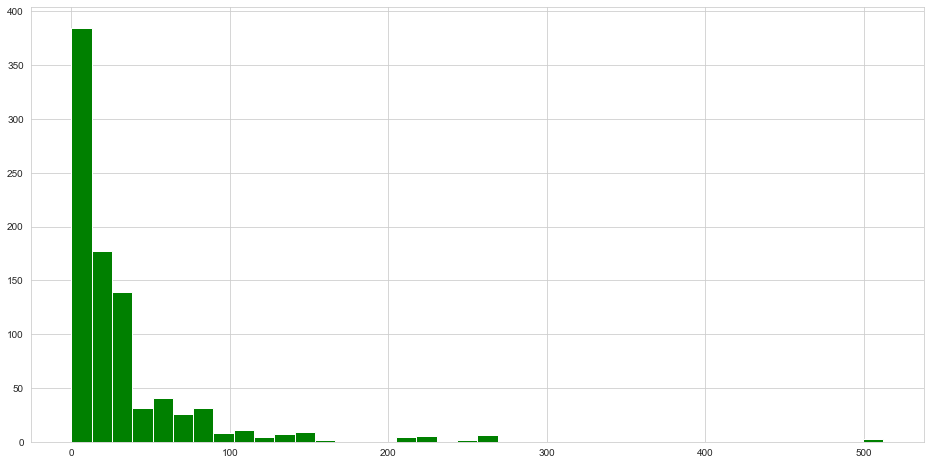

In [14]:
titanic['Fare'].hist(color='green',bins=40,figsize=(16,8));

## Handling missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


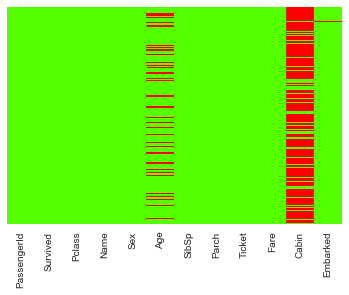

In [15]:
# Let's explore the missing values in the data

print (titanic.isnull().sum())
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='prism_r');

177 out of 891 of the age data is missing. Such missing values are incompatible with scikit-learn estimators which assume that all values in an array are numerical. Instead of dropping entire column or rows with missing values, I will impute the missing values (infer them from the known part of the age data)

Too many missing values in the Cabin column. Before deciding to drop the columns because of too much missing data, we can explore it to evaluate the importance of this feature


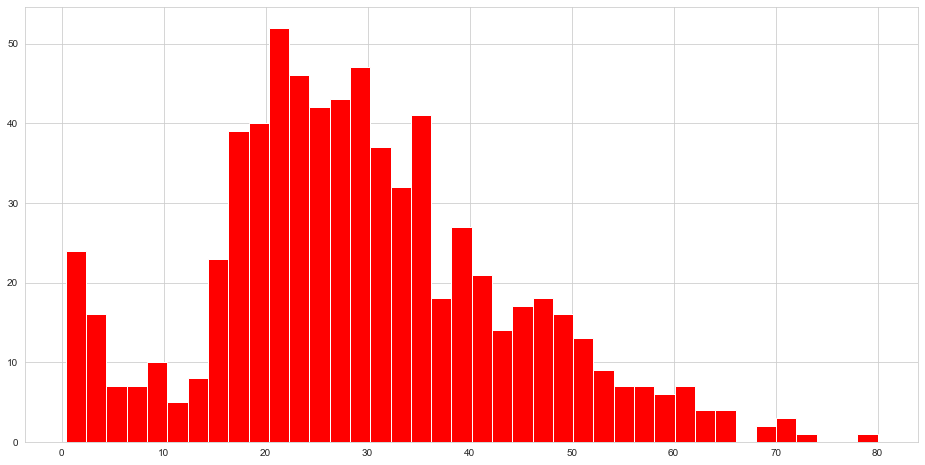

In [16]:
sns.set_style('whitegrid')
titanic['Age'].hist(color='red',bins=40,figsize=(16,8));

In [17]:
# the dataset shows that all NaN survived 

titanic.groupby(titanic['Age'].isnull()).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,,
False,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


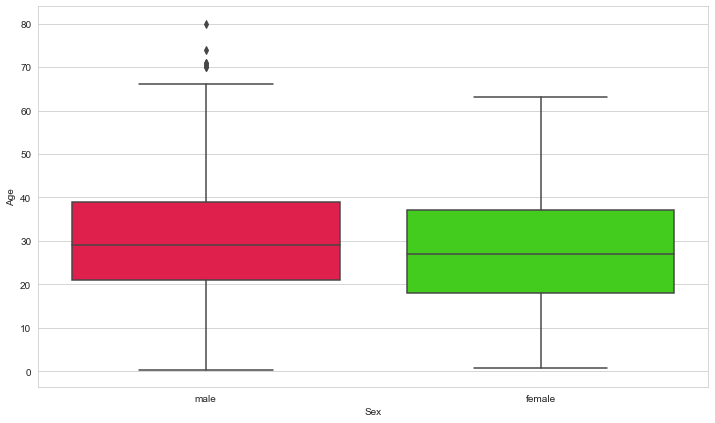

In [18]:
# Age does not seem to be corrolated to Sex
plt.figure(figsize=(12, 7))
sns.boxplot(x='Sex',y='Age',data=titanic,palette='prism_r');

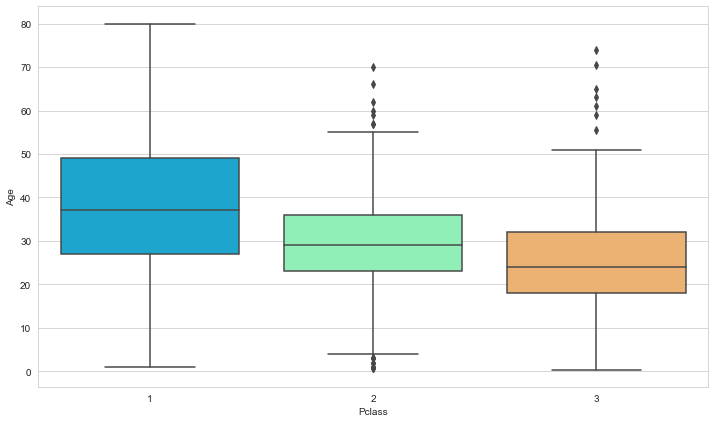

In [19]:
# Pclass seems to have a relationship with Age. 
# So I will use Pclass to determine the mean age for the missing values (Age column)

plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='rainbow');

The pattern shows that older passengers tend to afford higher classes. I will use the age brackets to impute missing values for age based on Pclass.

### Fill missing for `Age`

In [20]:
# Find the mean for the age for each Pclass
titanic.groupby('Pclass').Age.mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [21]:
# I will create a function that will fill missing values for age based on Pclass

def mean_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 29

        else:
            return 25

    else:
        return Age

#### If there were no corrolation between Age and other predictors, we could have simply used the mean of the Age column 

titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)


In [22]:
# Apply the function to the Age column

titanic['Age'] = titanic[['Age','Pclass']].apply(mean_age,axis=1)

In [23]:
# Verify that the the function has been applied and that there are no more missing values

titanic.Age.isnull().sum()

0

### Explore the importance of  'Cabin'


In [24]:
#the passengers that did not have a cabin are less likely to survive

titanic.groupby(titanic['Cabin'].isnull()).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Cabin,,,,,,,
False,455.401961,0.666667,1.196078,35.859902,0.441176,0.436275,76.141504
True,443.208151,0.299854,2.639010,27.290757,0.547307,0.365357,19.157325


In [25]:
# create a new column that will asign 0 to no cabin and 1 to cabin

titanic['Cabin'] = np.where(titanic['Cabin'].isnull(),0,1)
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,1,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,0,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,0,C


<Figure size 432x288 with 0 Axes>

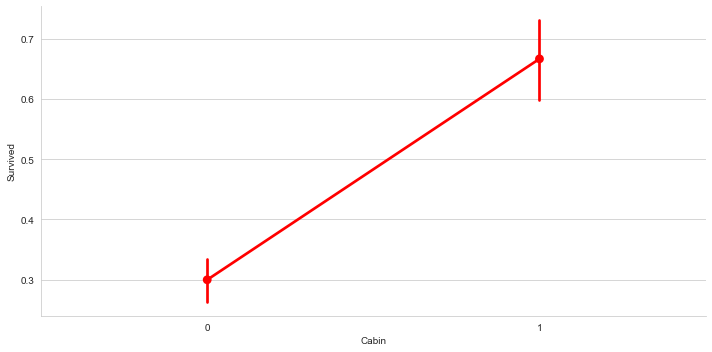

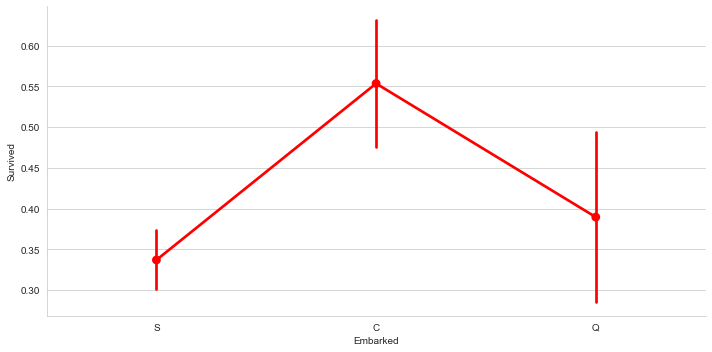

In [26]:
for i,col in enumerate(['Cabin','Embarked']):
    plt.figure(i)
    sns.catplot(x=col, y="Survived", data=titanic, kind='point', aspect=2,color='r')

In [27]:
# Try to understand the importance of 'Embarked'
titanic.pivot_table('Sex', index='Survived',columns='Embarked',aggfunc='count')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [28]:
# Try to understand the importance of 'Embarked' with regard to 'Cabin'
titanic.pivot_table('Survived', index='Cabin',columns='Embarked',aggfunc='count')

Embarked,C,Q,S
Cabin,,,
0,99,73,515
1,69,4,129


### Understand `SibSp` & `Parch`

Parch         0     1     2    3    4    5    6
Survived                                       
0         445.0  53.0  40.0  2.0  4.0  4.0  1.0
1         233.0  65.0  40.0  3.0  NaN  1.0  NaN


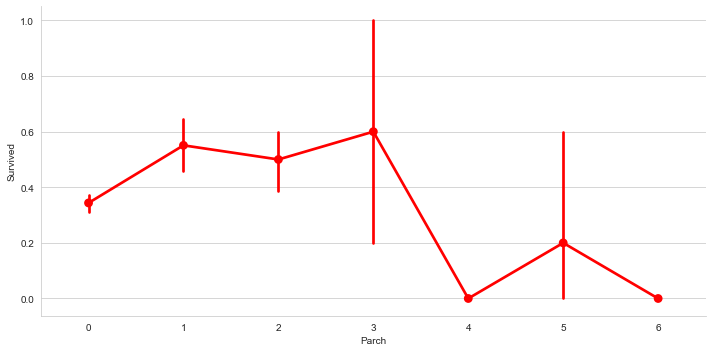

In [29]:
print (titanic.pivot_table('Sex', index='Survived',columns='Parch',aggfunc='count'))
sns.catplot(x='Parch', y="Survived", data=titanic, kind='point', aspect=2,color='r')

SibSp         0      1     2     3     4    5    8
Survived                                          
0         398.0   97.0  15.0  12.0  15.0  5.0  7.0
1         210.0  112.0  13.0   4.0   3.0  NaN  NaN


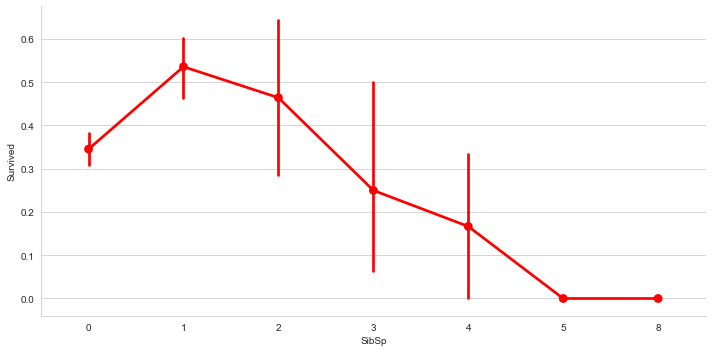

In [30]:
print (titanic.pivot_table('Sex', index='Survived',columns='SibSp',aggfunc='count'))
sns.catplot(x='SibSp', y="Survived", data=titanic, kind='point', aspect=2,color='r')

#### The two catplot are slightly different, so I will not try to combine them in one column


In [31]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


## Convert categorical features to binary and dummy variables

### Change  `Sex` to binary 

In [32]:
gender = {'male':0,'female':1}

In [33]:
titanic['Sex'] = titanic['Sex'].map(gender)

In [34]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,S


In [35]:
titanic.shape

(891, 12)

### Convert  `Embarked` to dummy variables 

In [36]:
embarked = pd.get_dummies(titanic['Embarked'],drop_first=True)

In [37]:
titanic = pd.concat([titanic,embarked],axis=1)

In [38]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,S,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,S,0,1


### Remove irrelevant columns

In [39]:
titanic_cleaned = titanic.drop(['PassengerId','Name','Ticket','Embarked'], axis=1)

In [40]:
titanic_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Q,S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,1,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


In [41]:
titanic_cleaned.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin         int32
Q             uint8
S             uint8
dtype: object

## Write out cleaned data

In [42]:
titanic_cleaned.to_csv('titanic_cleaned1.csv', index=False)

## Split data into training, validation, and test sets

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X = titanic_cleaned.drop('Survived', axis=1)

In [45]:
y= titanic_cleaned[['Survived']]

In [46]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [47]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

## Pipeline

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

In [54]:
rf = RandomForestClassifier()

In [55]:
scores = cross_val_score(rf,X_train, y_train.values.ravel(),cv=3)

In [174]:
scores

array([0.81730769, 0.79326923, 0.80193237])

In [167]:
scores.mean()

0.8041697634088938

In [197]:
!pip install yellowbrick

In [198]:
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from yellowbrick.model_selection import CVScores


C:\Users\ajaib\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ajaib\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ajaib\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ajaib\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

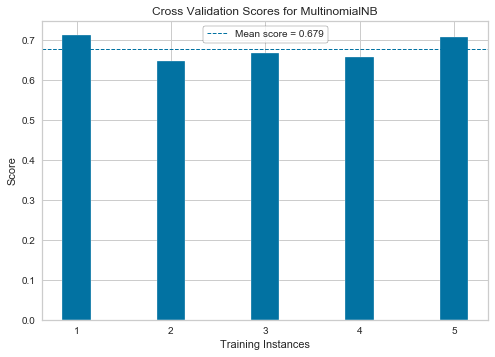

In [201]:
# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=5)

# Instantiate the classification model and visualizer
model = MultinomialNB()
visualizer = CVScores(model, cv=cv, scoring='f1_weighted')

visualizer.fit(X_train, y_train);        # Fit the data to the visualizer
visualizer.show();           # Finalize and render the figure

In [175]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [182]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 10, 20, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(X_train, y_train.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 10, 'n_estimators': 100}

0.774 (+/-0.093) for {'max_depth': 2, 'n_estimators': 5}
0.79 (+/-0.052) for {'max_depth': 2, 'n_estimators': 50}
0.796 (+/-0.08) for {'max_depth': 2, 'n_estimators': 100}
0.804 (+/-0.04) for {'max_depth': 10, 'n_estimators': 5}
0.793 (+/-0.065) for {'max_depth': 10, 'n_estimators': 50}
0.806 (+/-0.066) for {'max_depth': 10, 'n_estimators': 100}
0.774 (+/-0.102) for {'max_depth': 20, 'n_estimators': 5}
0.783 (+/-0.092) for {'max_depth': 20, 'n_estimators': 50}
0.791 (+/-0.072) for {'max_depth': 20, 'n_estimators': 100}
0.78 (+/-0.081) for {'max_depth': None, 'n_estimators': 5}
0.787 (+/-0.1) for {'max_depth': None, 'n_estimators': 50}
0.788 (+/-0.076) for {'max_depth': None, 'n_estimators': 100}


C:\Users\ajaib\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [183]:
rf1 = RandomForestClassifier(n_estimators=5, max_depth=10)
rf1.fit(X_train, y_train.values.ravel())

rf2 = RandomForestClassifier(n_estimators=100, max_depth=10)
rf2.fit(X_train, y_train.values.ravel())

rf3 = RandomForestClassifier(n_estimators=100, max_depth=None)
rf3.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [185]:
for mdl in [rf1, rf2, rf3]:
    y_pred = mdl.predict(X_test)
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred), 3)
    recall = round(recall_score(y_test, y_pred), 3)
    print('MAX DEPTH: {} / # OF EST: {} -- \t Accuracy: {} \t / Precision: {} \t / Recall: {}'.format(mdl.max_depth,
                                                                         mdl.n_estimators,
                                                                         accuracy,
                                                                         precision,
                                                                         recall))

MAX DEPTH: 10 / # OF EST: 5 -- 	 Accuracy: 0.836 	 / Precision: 0.833 	 / Recall: 0.741
MAX DEPTH: 10 / # OF EST: 100 -- 	 Accuracy: 0.858 	 / Precision: 0.872 	 / Recall: 0.759
MAX DEPTH: None / # OF EST: 100 -- 	 Accuracy: 0.84 	 / Precision: 0.835 	 / Recall: 0.75


## Evaluation

In [193]:
from sklearn.metrics import classification_report

In [194]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       160
           1       0.84      0.75      0.79       108

    accuracy                           0.84       268
   macro avg       0.84      0.82      0.83       268
weighted avg       0.84      0.84      0.84       268



In [188]:
pd.set_eng_float_format(accuracy=0,use_eng_prefix=True)
from sklearn.metrics import confusion_matrix

In [189]:
cm = confusion_matrix(y_test,y_pred)

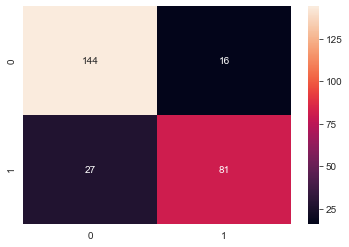

In [191]:
sns.heatmap(cm, annot=True,fmt="d");